In [1]:
import os, re
import pandas as pd
import numpy as np
import json

from csw_analysis import *

from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 22

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

### exp versions:
- csw1000block40.04.07.19
- csw1000block01.04.25.19 [:55]
- csw1000rand50.04.29.19 [19:]
- csw1000block01intheloc.05.01.19
- csw1000rand01.05.03.19 [rand10]
- csw1000block02.05.07.19

In [6]:
def group_plot(group_df,dataset_name,block_size=160,thresh=0.9,saving=True,axes=False):
  
  ## thresholding
  masked_group_tqdf = get_thresholded_tqdf(group_df,threshold=thresh)
  num_subs = len(masked_group_tqdf.index.get_level_values('subjnum').unique())
  Nsubs = len(group_df.index.get_level_values('subjnum').unique())
  print(num_subs,Nsubs)

  ## main plot
  grouping = 'story'
  
  M = masked_group_tqdf.correct_response.groupby([grouping]).mean()
  N = masked_group_tqdf.correct_response.groupby([grouping]).count()
  S = masked_group_tqdf.correct_response.groupby([grouping]).std()/np.sqrt(N)

  plt.figure(figsize=(15,4))
  ax = plt.gca()
  ax.plot(np.arange(len(M))+1,M,c='purple',lw=3)
  ax.fill_between(np.arange(1,201),M-S,M+S,
                    facecolor='purple',alpha=0.5)

  ## curriculum shading
  cL = ['green','blue']
  for idx,t1 in enumerate(range(0,160,block_size)):
    t2 = t1+block_size+1
    ax.fill_between(np.arange(t1,t2),0.2,1.01,
                    facecolor=cL[idx%2],alpha=0.1)
  ax.fill_between(np.arange(160,201),0.2,1.01,
                    facecolor='red',alpha=0.2)

  ## extra
  ax.axhline(0.5,c='lime',ls='--')
  ax.set_yticks(np.arange(0,1.1,.1))
  ax.set_xlim(0,200)
  ax.set_ylim(0.2,1.01)
  ax.grid(axis='y')
  
  if not axes:
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
  title = 'group_%s-avgwi_%s-N_%i(%i)'%(dataset_name,grouping,num_subs,Nsubs)
#   plt.title(title)
  if saving:
    plt.savefig('figures/CEMS19/'+title,format='png')

### exp versions:
- csw1000block40.04.07.19
- csw1000block01.04.25.19 [:55]
- csw1000block02.05.07.19
- csw1000rand50.04.29.19 [19:]
- csw1000block01intheloc.05.01.19
- csw1000rand01.05.03.19 [rand10]


In [7]:
dataL = [
  "RT40B1000cl",
  "RT01B1000cl",
  "csw1000block40.04.07.19",
  "csw1000block01.04.25.19",
  "csw1000block02.05.07.19",
  "csw1000rand50.04.29.19",
  "csw1000block01intheloc.05.01.19",
  "csw1000rand01.05.03.19",
  "csw1000boldmdp.05.09.19"]

RT40B1000cl
table name: CSWfall18
versions found ['10.13.18' '1000cl' '1000clq' '9010cl' 'i1000cl' '20B1000cl'
 'RT40B1000cl']
loading code version: RT40B1000cl
N = 50 subjects
32 49
RT01B1000cl
exp versions found in table:
10.13.18
1000cl
1000clq
9010cl
i1000cl
20B1000cl
RT01B1000cl
csw1000block40.04.07.19
csw1000block01.04.25.19
csw1000block02.04.26.19
csw1000rand50.04.29.19
csw1000block01intheloc.05.01.19
csw1000rand01.05.03.19
csw1000block02.05.07.19
csw1000boldmdp.05.09.19

-loading code version: RT01B1000cl
N = 55 subjects
38 54
csw1000block40.04.07.19
exp versions found in table:
10.13.18
1000cl
1000clq
9010cl
i1000cl
20B1000cl
RT01B1000cl
csw1000block40.04.07.19
csw1000block01.04.25.19
csw1000block02.04.26.19
csw1000rand50.04.29.19
csw1000block01intheloc.05.01.19
csw1000rand01.05.03.19
csw1000block02.05.07.19
csw1000boldmdp.05.09.19

-loading code version: csw1000block40.04.07.19
N = 63 subjects
26 62
csw1000block01.04.25.19
exp versions found in table:
10.13.18
1000cl
1000clq


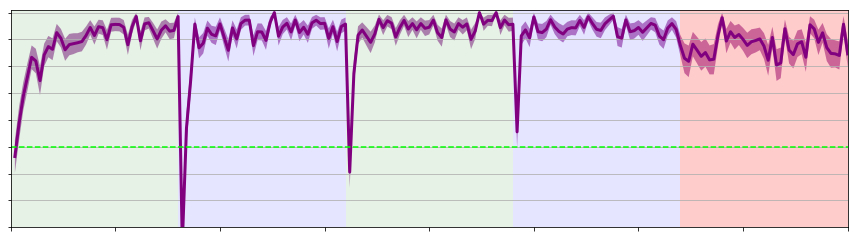

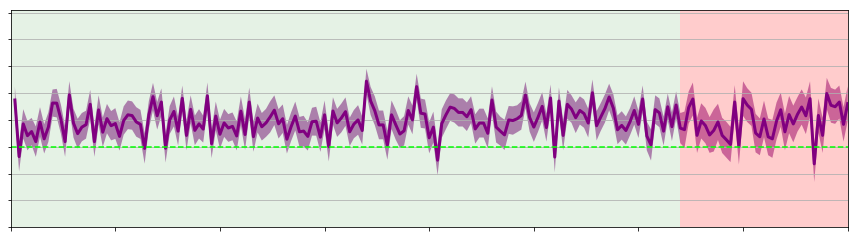

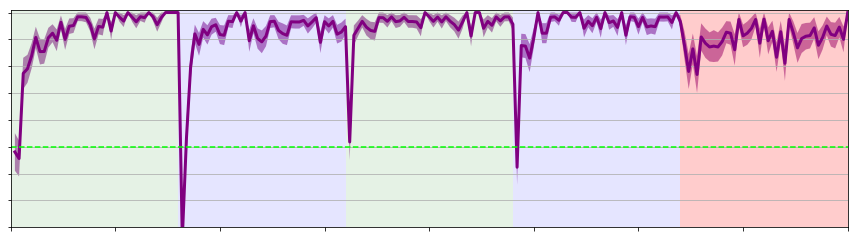

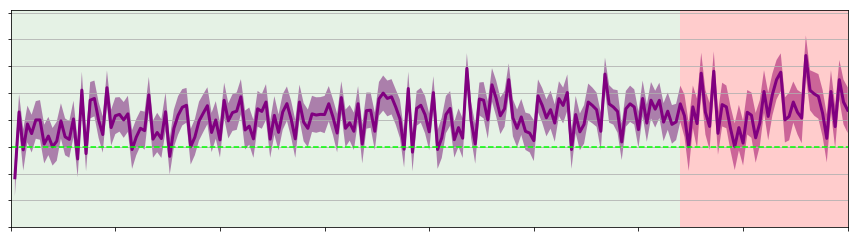

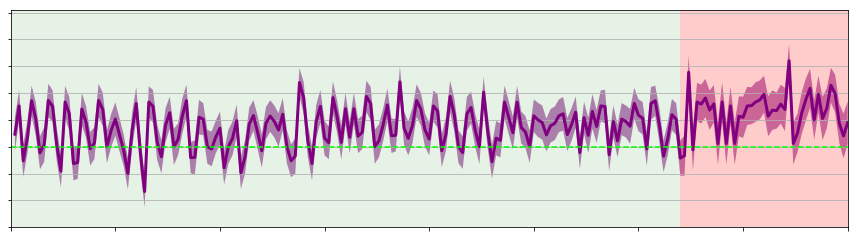

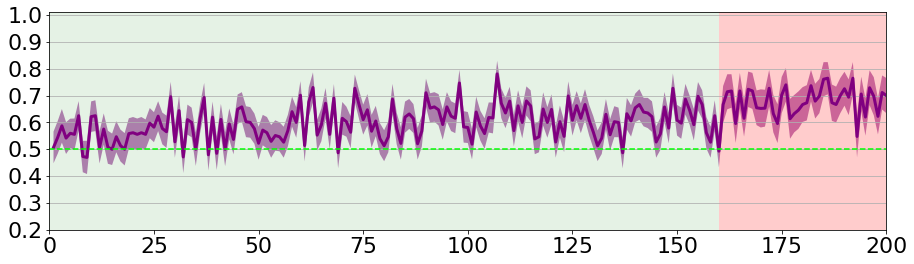

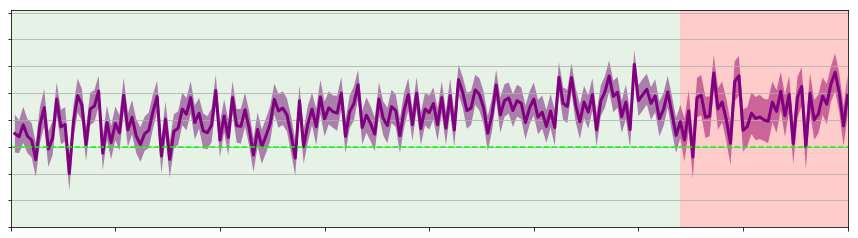

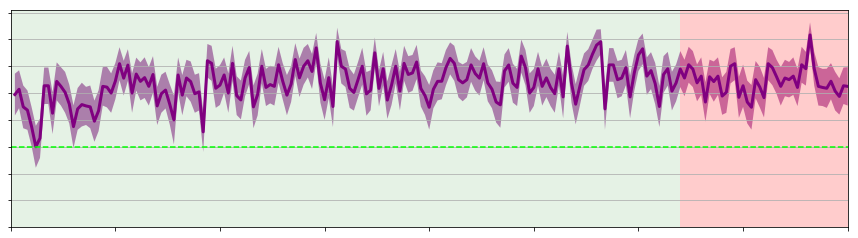

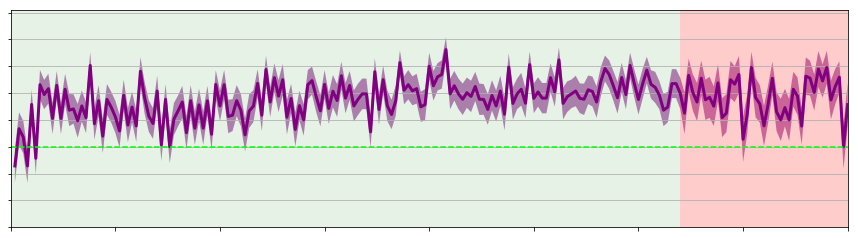

In [8]:
for dsname in dataL:
  idx0 = 0
  idx1 = -1
  block_size=160
  axes=False
  if dsname == 'csw1000block01.04.25.19':
    idx1 = 55
  elif dsname == 'csw1000rand50.04.29.19':
    idx0 = 19
  if dsname == 'csw1000block40.04.07.19':
    block_size = 40
  if dsname=='RT40B1000cl':
    block_size = 40
  if dsname == 'csw1000rand50.04.29.19':
    axes=True
  print(dsname)
  sql_df = get_sql_df(dsname)
  sql_df = sql_df[idx0:idx1] # keep first 50 only
  group_df = make_group_df(sql_df)
  group_plot(group_df,dsname,block_size=block_size,axes=axes,saving=True)

# sweep thresh

In [5]:
# for dsname in dataL:
#   print('------>',dsname)
#   plt.figure(figsize=(20,9))
#   sql_df = get_sql_df(dsname)
#   idx0=None
#   idx1=None
#   if dsname == 'csw1000block01.04.25.19':
#     idx1 = 55
#   elif dsname == 'csw1000rand50.04.29.19':
#     idx0 = 19
#   sql_df = sql_df[idx0:idx1]
#   group_df = make_group_df(sql_df)

#   for thresh in [0.9,0.8,0.7,0.6]:
#     try:
#       masked_group_tqdf = get_thresholded_tqdf(group_df,threshold=thresh)
#     except:
#       continue
#     M = masked_group_tqdf.correct_response.groupby(['story']).mean()
#     N = masked_group_tqdf.correct_response.groupby(['story']).count()
#     S = masked_group_tqdf.correct_response.groupby(['story']).std()/np.sqrt(N)
#     num_subs = len(masked_group_tqdf.index.get_level_values('subjnum').unique())
#     plt.plot(M,lw=1,label="thresh=%.2f,N=%i"%(thresh,num_subs))
#     plt.title(dsname)

#   plt.ylim(0.2,1.01)
#   plt.axhline(0.5,c='r',ls='--')
#   plt.legend(loc=4)
#   plt.savefig('figures/CEMS19/threshexplore-%s'%(dsname.replace('.','-')))